In [1]:
#1 Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Load and clean data
df = pd.read_csv('Aemf1.csv')
print("Dataset columns:")
print(df.columns)
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("Missing Values\n", df.isnull().sum())
df.dropna()

Dataset columns:
Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

Data types:
City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)           

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [3]:
# Encode categorical columns 
categorical_columns = ['City', 'Day', 'Room Type']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [4]:
# Drop redundant columns in case they exist
df = df.drop(['Shared Room', 'Private Room'], axis=1, errors='ignore')

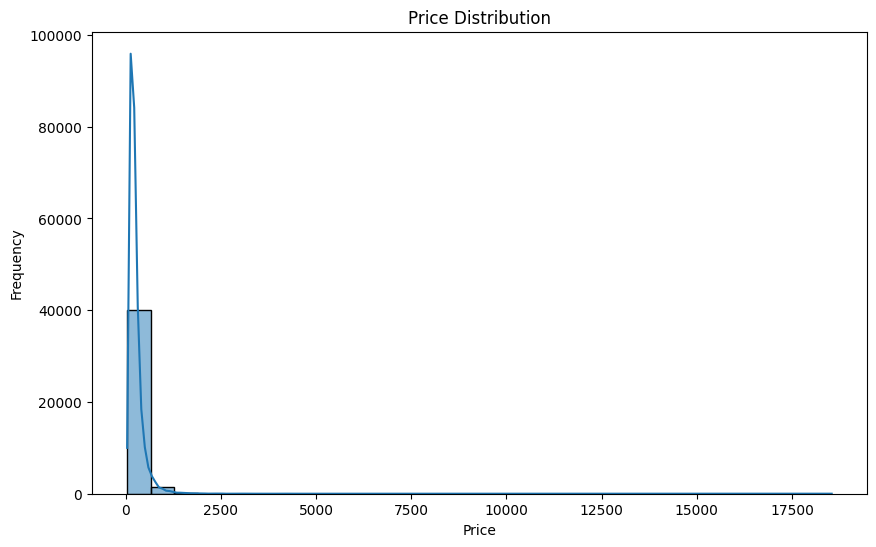

In [5]:
# Exploratory analysis: Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

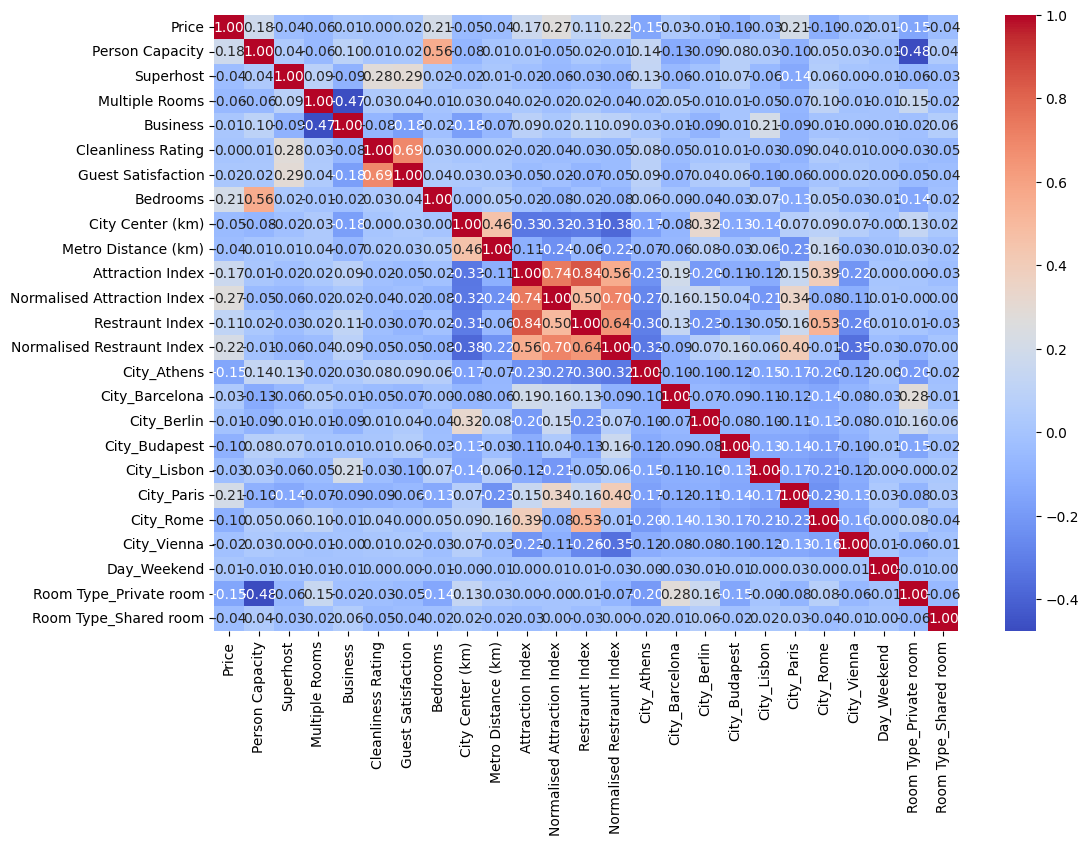

In [6]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [7]:
# Define features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Mean Squared Error (Linear Regression):",
      mean_squared_error(y_test, y_pred_lr))

Mean Squared Error (Linear Regression): 79855.91231628577


In [10]:
# Random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Mean Squared Error (Random Forest):", mean_squared_error(y_test, y_pred_rf))

Mean Squared Error (Random Forest): 62170.656559590505


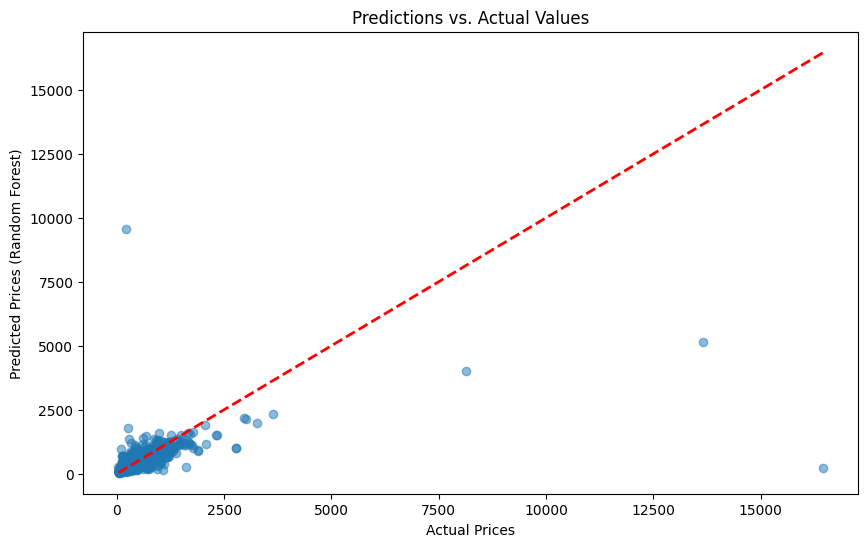

In [11]:
# Visualization of results (Random Forest)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Random Forest)')
plt.title('Predictions vs. Actual Values')
plt.show()

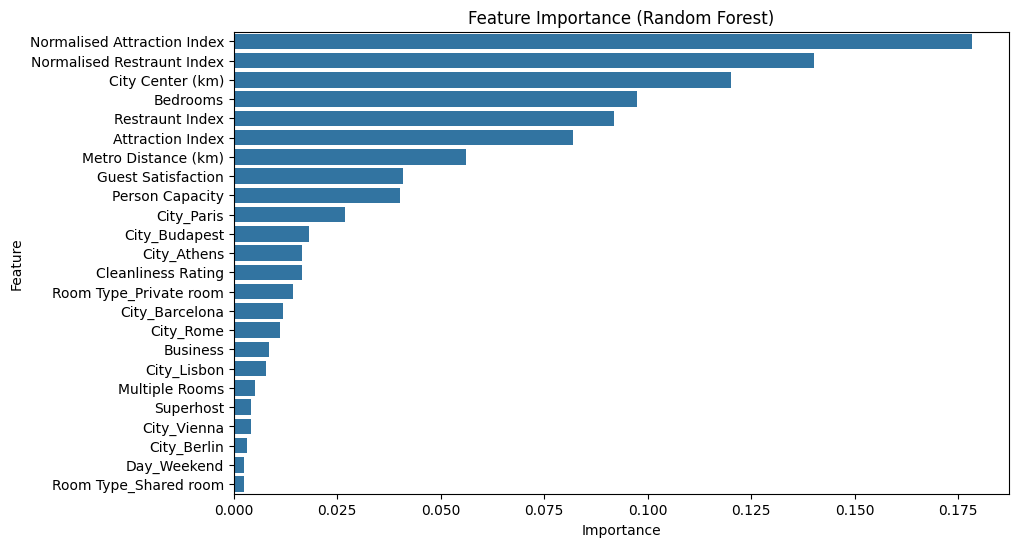

In [12]:
# Feature importance (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Final Thoughts 

## Model Performance:
The Random Forest model outperformed Linear Regression, achieving a lower MSE (62,170.66 vs. 79,855.91), indicating better predictive accuracy for Airbnb prices. This suggests that Random Forest better captures the complex, non-linear relationships between the features and the target variable (Price).
The MSE values suggest there is still room for improvement, as the errors are relatively high, possibly due to the dataset's variability or unmodeled factors influencing prices.

## Dataset and Preprocessing:
The dataset required handling categorical variables (e.g., City, Day, Room Type), which were encoded using one-hot encoding to enable numerical processing. Missing values were addressed by dropping them, ensuring robust model training.
Exploratory analysis (e.g., price distribution and correlation matrix) provided insights into the data, revealing key features influencing prices, such as location-based variables and room characteristics.

## The Random Forest model, with its lower MSE, is a promising tool for predicting Airbnb listing prices, enabling hosts to optimize pricing based on factors like location, room type, and guest ratings. However, the relatively high MSE suggests potential improvements, such as incorporating additional features (e.g., seasonality, amenities), tuning hyperparameters, or exploring other models